<a href="https://colab.research.google.com/github/Shaheer99Ahmed/DM_Stanford_dog/blob/main/Shaheer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from skimage.color import rgb2gray
import xml.etree.ElementTree as ET
from skimage import io, exposure, filters

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

In [ ]:
import warnings

def handle_warning(warning, category, filename, lineno, file=None, line=None):
    pass

warnings.filterwarnings("default")
warnings.formatwarning = handle_warning

In [ ]:
def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

In [ ]:
image_dir = "/content/drive/MyDrive/Programming/images"
annotation_dir = "/content/drive/MyDrive/Programming/annotations"

In [ ]:
cl_names = ['Siberian husky', 'standard poodle', 'Labrador retriever', 'Cardigan']

In [ ]:
class_paths = ['n02113186-Cardigan','n02110185-Siberian_husky','n02099712-Labrador_retriever','n02113799-standard_poodle']

In [ ]:
new_dir = "/content/drive/MyDrive/Programming/processed"

## Edge histogram Data

In [ ]:
# Create an empty DataFrame with columns ranging from 0 to 35
df = pd.DataFrame(columns = list(range(0,36))+['class'])

# Iterate over each class in class_paths
for class_ in class_paths:
  # Construct the path to the current class directory
  cl_path = os.path.join(new_dir,class_)
  print(class_)
  for filename in os.listdir(cl_path):
    img = io.imread(os.path.join(cl_path,filename))

    # Convert the image to grayscale
    gray = rgb2gray(img)

    # Calculate the angle using Sobel operators
    sobel_angle = angle(filters.sobel_h(gray),filters.sobel_v(gray))

   # Compute the histogram and bin edges for the angle values
    hist,bins = exposure.histogram(sobel_angle,nbins=36)

    df.loc[len(df)] = list(hist)+[class_paths.index(class_)]




n02113186-Cardigan
n02110185-Siberian_husky
n02099712-Labrador_retriever
n02113799-standard_poodle


In [ ]:
df.to_csv("/content/drive/MyDrive/Programming/edge_data.csv")

## Spliting into Test & Train Sets

In [ ]:
X = np.array(df[df.columns[:-1]])
y = np.array(df['class'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
scalled_x_train = scaler.transform(X_train)
scalled_x_test = scaler.transform(X_test)

## KNN K-fold

In [ ]:
# creating empty lists
mean_vl_errors_std = []
mean_vl_errors_strat = []
mean_train_errors_std = []
mean_train_errors_strat = []

# list of k values
k_values = [1, 3, 5, 7, 10, 20]
for k in k_values:
    # Standard 5-fold cross-validation
    kf = KFold(n_splits=5)
    knn = KNeighborsClassifier(n_neighbors=k)

    #calculating validation scores
    vl_scores_std = cross_val_score(knn, scalled_x_train, y_train, cv=kf)

    #calculating training scores
    train_scores_std = knn.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)

    #calculating mean validation scores
    mean_vl_errors_std.append(1 - np.mean(vl_scores_std))

    #calculating mean training error
    mean_train_errors_std.append(1 - train_scores_std)

    #stratified 5-fold
    skf = StratifiedKFold(n_splits=5)
    vl_scores_strat = cross_val_score(knn, scalled_x_train, y_train, cv=skf)
    train_scores_strat = knn.fit(scalled_x_train, y_train).score(scalled_x_train, y_train)
    mean_vl_errors_strat.append(1 - np.mean(vl_scores_strat))
    mean_train_errors_strat.append(1 - train_scores_strat)


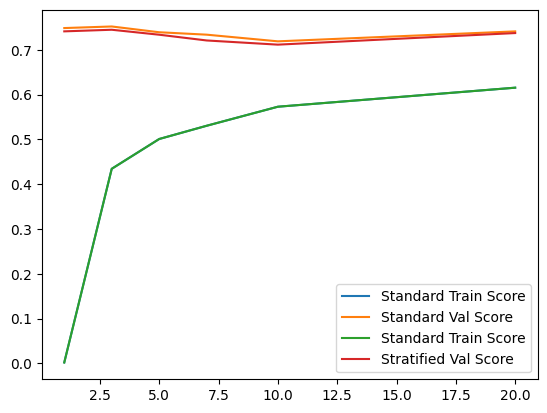

In [ ]:
# Create a figure and axes objects for plotting
fig,ax = plt.subplots()

ax.plot(k_values,mean_train_errors_std,label="St Train Score")
ax.plot(k_values,mean_vl_errors_std,label="St Vl Score")
ax.plot(k_values,mean_train_errors_strat,label="St Train Score")
ax.plot(k_values,mean_vl_errors_strat,label="Stratified Vl Score")

ax.legend()
plt.show()

In [ ]:
print(mean_train_errors_std)
print(mean_vl_errors_std)
print(mean_train_errors_strat)
print(mean_vl_errors_strat)

[0.001848428835489857, 0.43438077634011085, 0.5009242144177449, 0.5304990757855823, 0.5730129390018484, 0.6155268022181146]
[0.7486918110771321, 0.7522256201155284, 0.7393306150186885, 0.7339279646619097, 0.7190451919809717, 0.7412844036697248]
[0.001848428835489857, 0.43438077634011085, 0.5009242144177449, 0.5304990757855823, 0.5730129390018484, 0.6155268022181146]
[0.741335372069317, 0.7449201495073055, 0.7338260278627251, 0.7209819911654773, 0.7116547740400951, 0.7375297315664288]


In [ ]:
k_values

[1, 3, 5, 7, 10, 20]

- Lowest standard train error is minimum at k = 1, 0.0036968
- Lowest Standrad Val mean Error  at  k = 7, 0.709734
- Lowest Stratified Training mean Error  at k = 1, 0.003696
- Lowest Stratified Val mean Error at k = 20, 0.713438

Overfiting at K =1 as Train error is low and val error is high.

As Stratified Val error is lowest at k + 20

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(scalled_x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
error = 1- knn.score(scalled_x_test,y_test)

In [ ]:
error

0.7573529411764706

Test Score = 0.6721311475409837

## Performance Comparison

In [ ]:
def get_val_scores(skf,clf,name,X_train,y_train):
  vl_accuracy = [] # List to store validation accuracy scores

  # Iterate over each fold in the StratifiedKFold object
  for fold, (start_train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        X_start_train, X_val = X_train[start_train_index], X_train[val_index]
        y_start_train, y_val = y_train[start_train_index], y_train[val_index]

        clf.fit(X_start_train, y_start_train)

        # Predict on the validation set
        y_pred = clf.predict(X_val)

        vl_k_fold_score= accuracy_score(y_val,y_pred)
        vl_accuracy.append(vl_k_fold_score)

  return vl_accuracy


In [ ]:
cl_names

['Siberian husky', 'standard poodle', 'Labrador retriever', 'Cardigan']

In [ ]:
def get_f1_score(clf,X,y_true):
  y_pred = clf.predict(X)
  return f1_score(y_true,y_pred,average="weighted")

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
rf_vl_accuracy = get_val_scores(skf,rf_clf,"Random Forest",scalled_x_train,y_train)

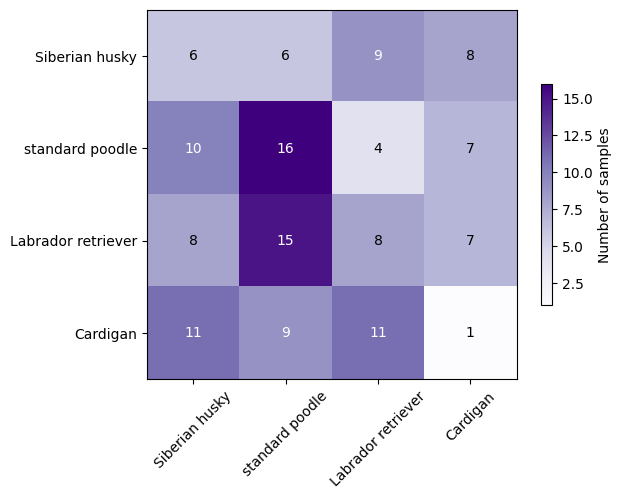

In [ ]:
y_pred = rf_clf.predict(scalled_x_test)
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
_,ax = plt.subplots(1,1)
im = ax.imshow(cm,interpolation='nearest', cmap=plt.cm.Purples)
ax.xticks_set(np.arange(len(cl_names)))
ax.yticks_set(np.arange(len(cl_names)))
ax.xticklabels_set(cl_names,rotation=45)
ax.yticklabels_set(cl_names)
for k in range(len(cl_names)):
  for j in range(len(cl_names)):
      ax.text(j, k, str(cm[k, j]), ha='center', va='center', color='white' if cm[k, j] > cm.max() / 2 else 'black')

cbar = fig.colorbar(im, ax=ax, shrink=0.6)
cbar.ax.set_ylabel('Number of samples')
plt.show()

In [ ]:
NN_Clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10,))

In [ ]:
nn_vl_accuracy = get_val_scores(skf,NN_Clf,"NN CLassifier",scalled_x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

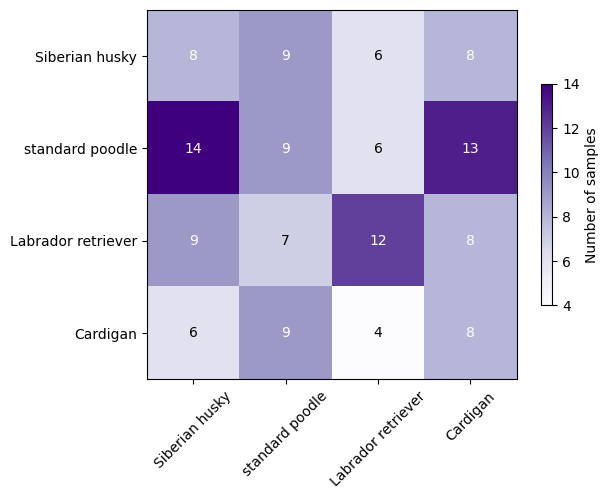

In [ ]:
y_pred = NN_Clf.predict(scalled_x_test)
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
_,ax = plt.subplots(1,1)
im = ax.imshow(cm,interpolation='nearest', cmap=plt.cm.Purples)
ax.xticks_set(np.arange(len(cl_names)))
ax.yticks_set(np.arange(len(cl_names)))
ax.xticklabels_set(cl_names,rotation=45)
ax.yticklabels_set(cl_names)
for k in range(len(cl_names)):
  for j in range(len(cl_names)):
      ax.text(j, k, str(cm[k, j]), ha='center', va='center', color='white' if cm[k, j] > cm.max() / 2 else 'black')

cbar = fig.colorbar(im, ax=ax, shrink=0.6)
cbar.ax.set_ylabel('Number of samples')
plt.show()

In [ ]:
nb_clf = GaussianNB()

In [ ]:
nb_vl_accuracy = get_val_scores(skf,nb_clf,"NB CLassifier",scalled_x_train,y_train)

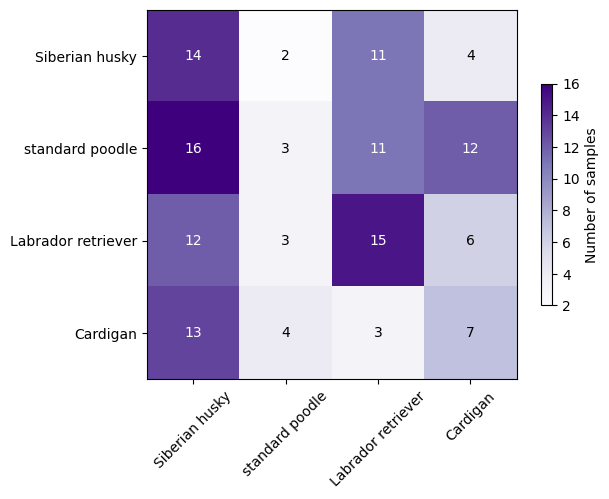

In [ ]:
y_pred = nb_clf.predict(scalled_x_test)
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
_,ax = plt.subplots(1,1)
im = ax.imshow(cm,interpolation='nearest', cmap=plt.cm.Purples)
ax.xticks_set(np.arange(len(cl_names)))
ax.yticks_set(np.arange(len(cl_names)))
ax.xticklabels_set(cl_names,rotation=45)
ax.yticklabels_set(cl_names)
for k in range(len(cl_names)):
  for j in range(len(cl_names)):
      ax.text(j, k, str(cm[k, j]), ha='center', va='center', color='white' if cm[k, j] > cm.max() / 2 else 'black')

cbar = fig.colorbar(im, ax=ax, shrink=0.6)
cbar.ax.set_ylabel('Number of samples')
plt.show()

Random forest is best in both Test accuracy and F1 score

In [ ]:
print('Random Forest Validation Accuracy:', np.mean(rf_vl_accuracy))
print('Naive bayes Validation Accuracy:', np.mean(nb_vl_accuracy))
print('Nueral Network Validation Accuracy:', np.mean(nn_vl_accuracy))

Random Forest Validation Accuracy: 0.25132517838939855
Naive bayes Validation Accuracy: 0.22733605164797824
Nueral Network Validation Accuracy: 0.2716445803601767


In [ ]:
y_pred = rf_clf.predict(scalled_x_test)
print("Random Forest Test Accuracy:", accuracy_score(y_test,y_pred))

y_pred = nb_clf.predict(scalled_x_test)
print("Naive Bayes Test Accuracy:", accuracy_score(y_test,y_pred))

y_pred = NN_Clf.predict(scalled_x_test)
print("Nueral Network Test Accuracy:", accuracy_score(y_test,y_pred))

Random Forest Test Accuracy: 0.22794117647058823
Naive Bayes Test Accuracy: 0.16911764705882354
Nueral Network Test Accuracy: 0.25


In [ ]:
get_f1_score(rf_clf,scalled_x_test,y_test)

0.2172934624287831


In [ ]:
print(f"Random forest:{get_f1_score(rf_clf,scalled_x_test,y_test)}")
print(f'Naive Bayes: {get_f1_score(nb_clf,scalled_x_test,y_test)}')
print(f'Nueral Network: {get_f1_score(NN_Clf,scalled_x_test,y_test)}')


Random forest:0.2172934624287831
Naive Bayes: 0.11805394827422495
Nueral Network: 0.2505403263571197
